## CASK FR1 Correct Rate

In [ ]:
import sys
sys.path.insert(0, '../scripts')

from accuracy import graph_cumulative_acc, read_and_record, \
            graph_avg_accuracy, graph_avg_learned_line
from intervals import perform_T_test
from preprocessing import get_all_sheet_names

ctrl_path = '../FR1_ctrl.xlsx'
cask_path = '../FR1_cask.xlsx'
ctrl_sheets = get_all_sheet_names(ctrl_path)
cask_sheets = get_all_sheet_names(cask_path)

ctrl_ending_corr = []
cask_ending_corr = []
ctrl_learned_time = []
cask_learned_time = []

## Control Group

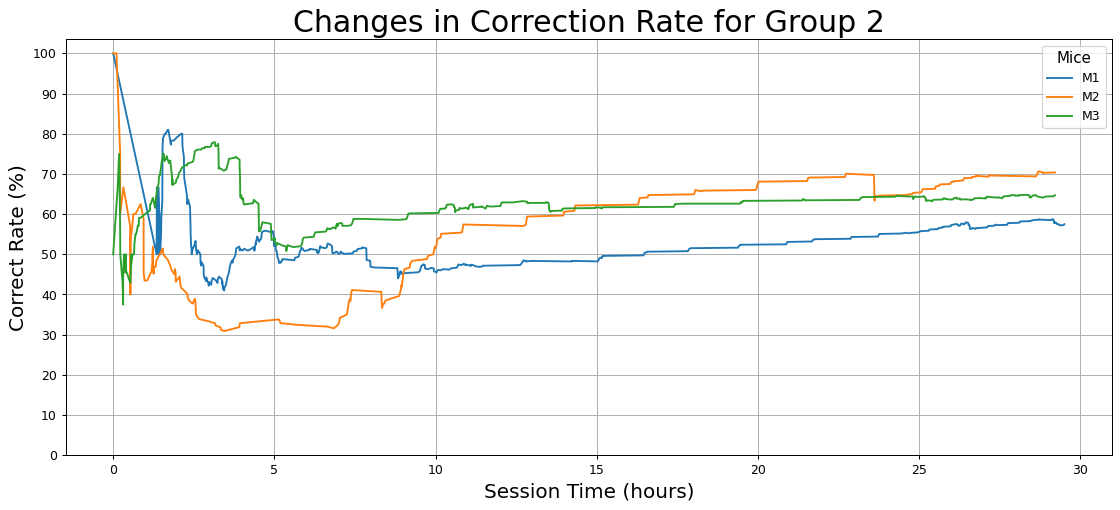

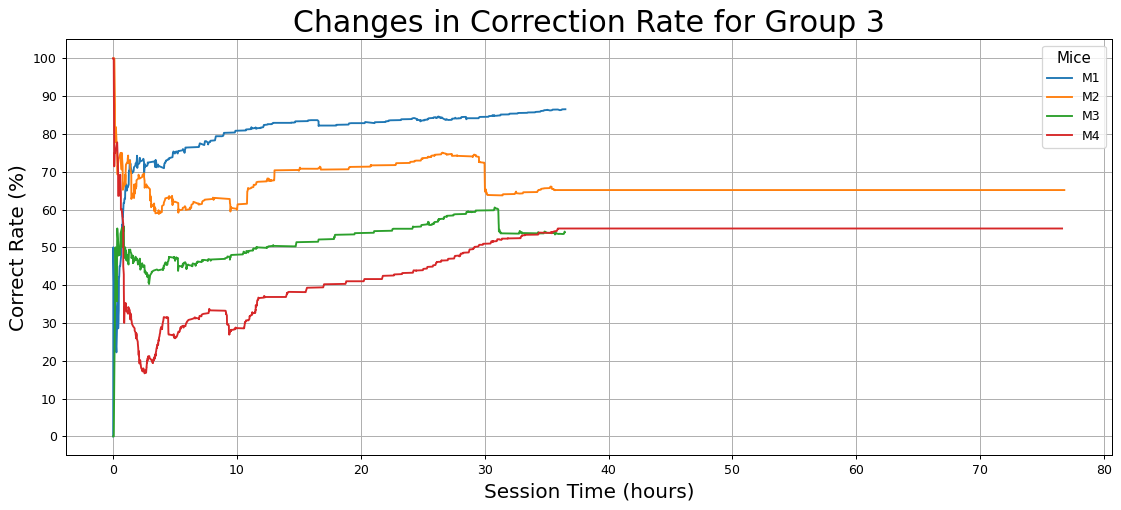

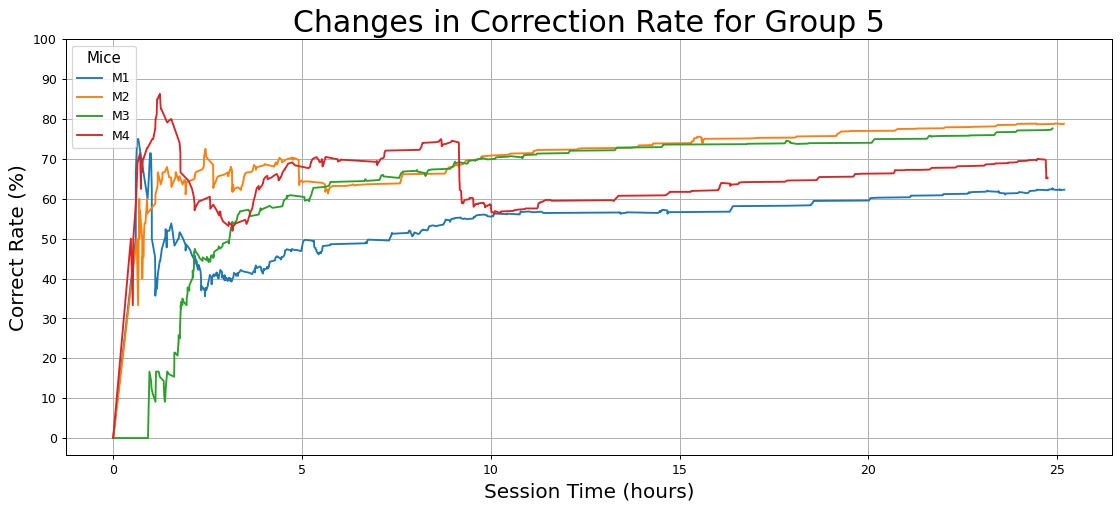

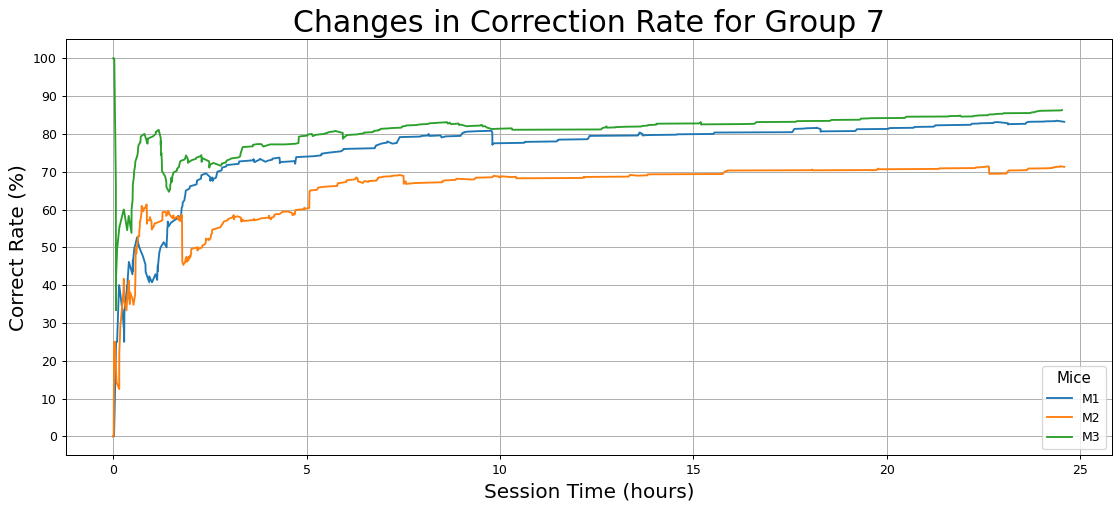

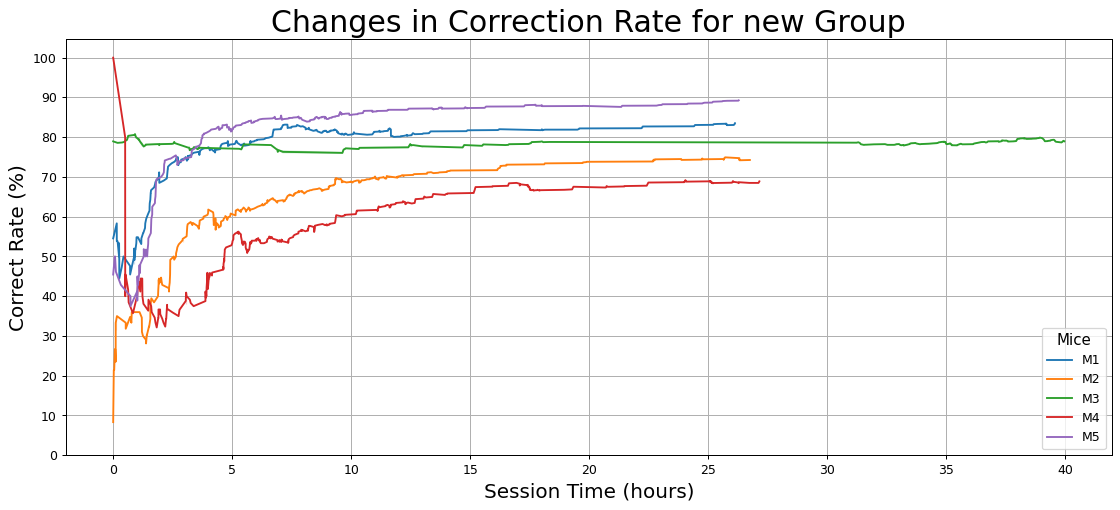

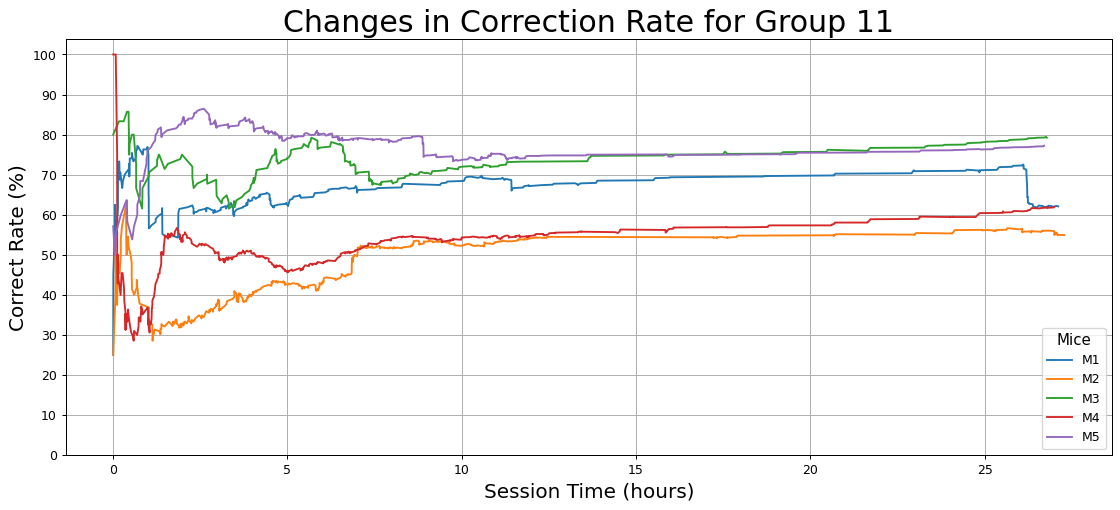

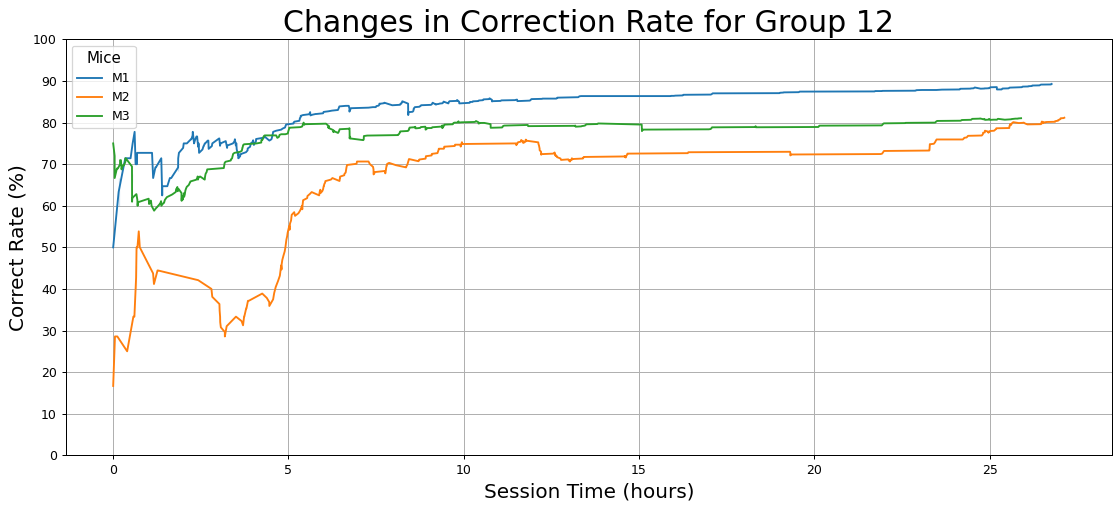

In [2]:
group_data = []
curr_group = int(ctrl_sheets[0].split('.')[0][1:]) if ctrl_sheets[0].startswith('B') else 'new'

for sheet in ctrl_sheets:
    temp = int(sheet.split('.')[0][1:]) if sheet.startswith('B') else 'new'
    data = read_and_record(path=ctrl_path, sheet=sheet, 
                           ending_corr=ctrl_ending_corr, 
                           learned_time=ctrl_learned_time)
    if temp != curr_group:
        graph_cumulative_acc(group_data, curr_group)
        group_data = []
    group_data.append(data)
    curr_group = temp

if len(group_data) > 0: 
    graph_cumulative_acc(group_data, curr_group)

## CASK Group

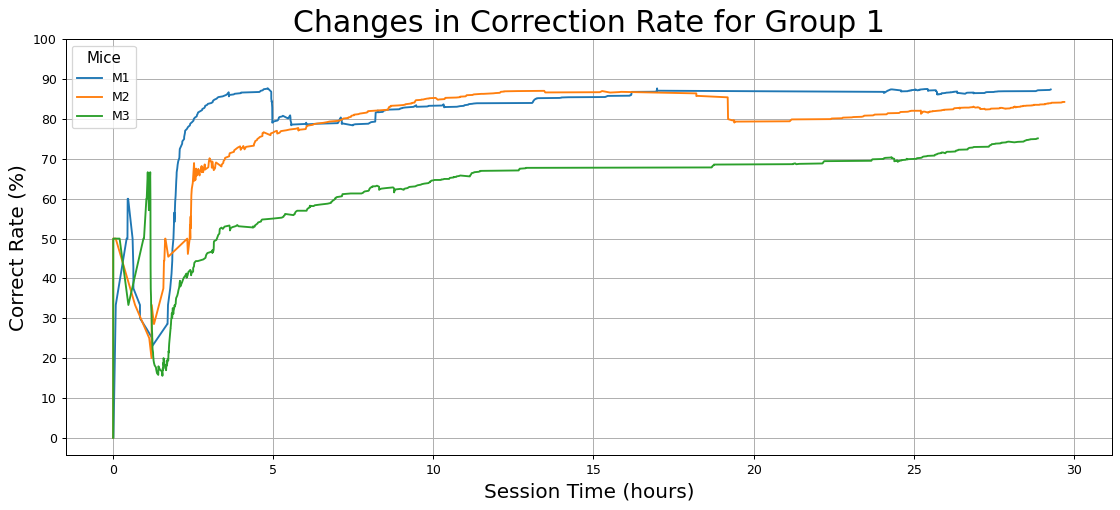

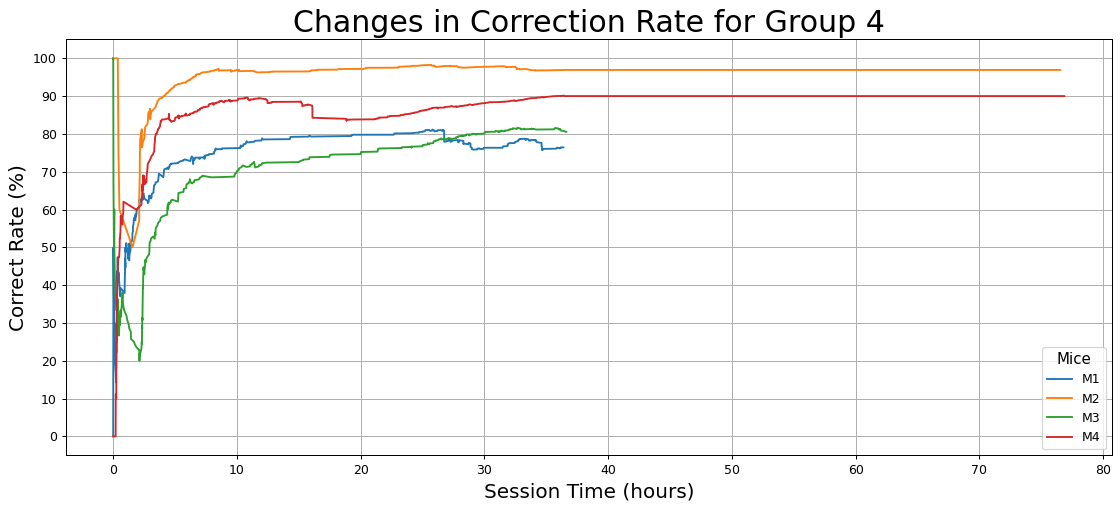

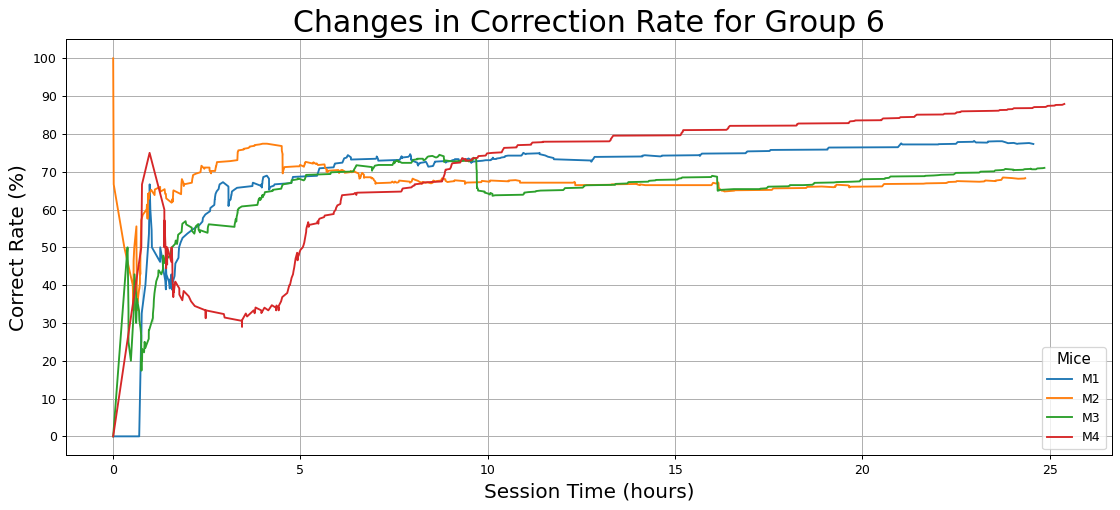

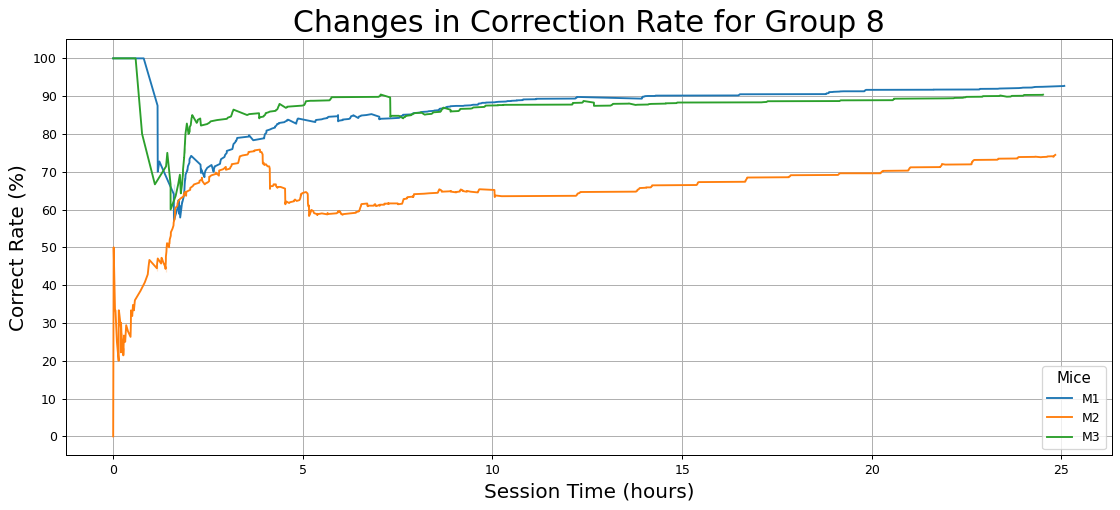

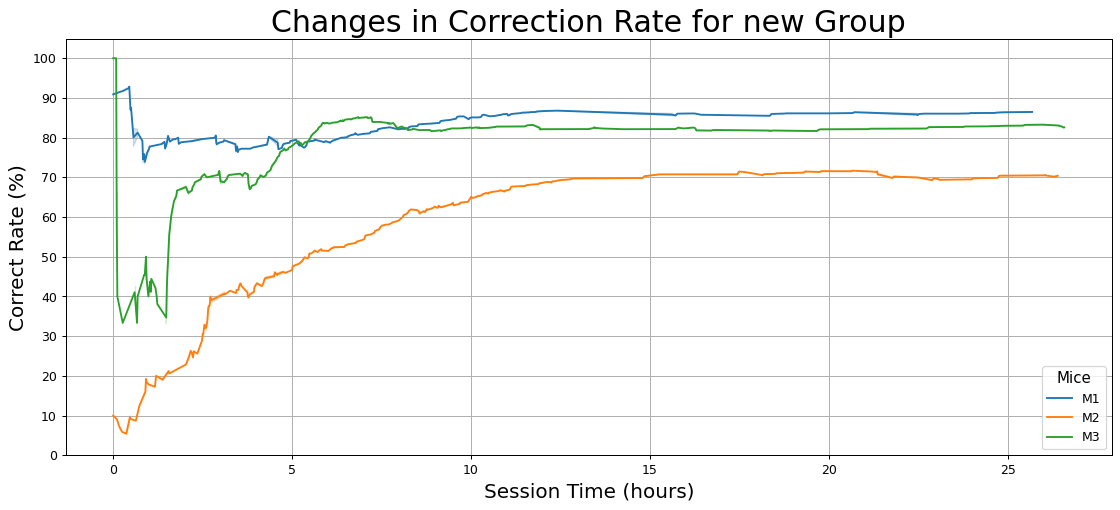

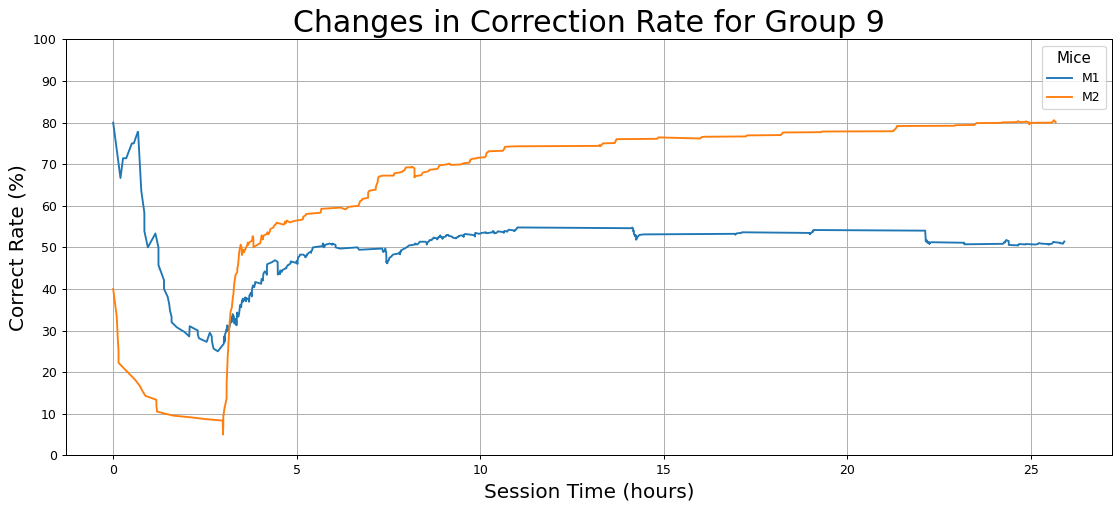

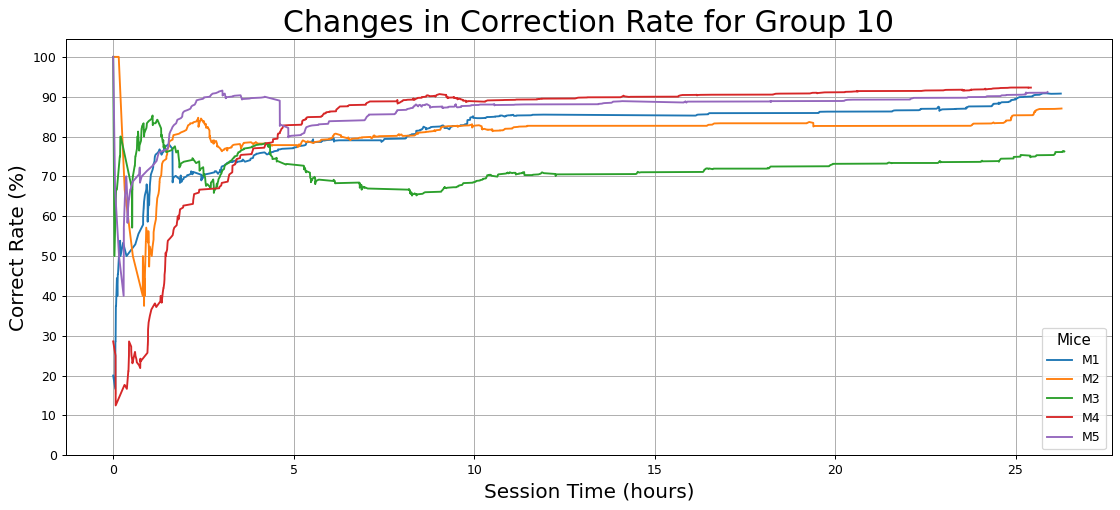

In [3]:
group_data = []
curr_group = int(cask_sheets[0].split('.')[0][1:]) if cask_sheets[0].startswith('B') else 'new'

for sheet in cask_sheets:
    temp = int(sheet.split('.')[0][1:]) if sheet.startswith('B') else 'new'
    data = read_and_record(path=cask_path, sheet=sheet, 
                           ending_corr=cask_ending_corr, 
                           learned_time=cask_learned_time)
    if temp != curr_group:
        graph_cumulative_acc(group_data, curr_group)
        group_data = []
    group_data.append(data)
    curr_group = temp

if len(group_data) > 0: 
    graph_cumulative_acc(group_data, curr_group)

### Analysis

In [4]:
print("Control Group 1st Learned Time:", ctrl_learned_time)
print("CASK Group 1st Learned Time:", cask_learned_time)

Control Group 1st Learned Time: [11.453888888888889, 8.321666666666667, 0.5322222222222223, 0.4041666666666667, 6.178055555555556, 12.91388888888889, 12.319166666666666, 5.451388888888889, 5.62, 2.5794444444444444, 3.0569444444444445, 0.8397222222222223, 3.1222222222222222, 1.3444444444444446, 0.36, 2.0083333333333333, 3.216666666666667, 7.364722222222222, 0.3227777777777778, 4.540555555555556, 11.881388888888889, 3.111111111111111, 6.09, 0.0, 1.4025, 3.5016666666666665, 1.24]
CASK Group 1st Learned Time: [0.42, 2.549722222222222, 2.439722222222222, 1.2980555555555555, 1.5669444444444445, 2.1222222222222222, 0.20222222222222222, 1.553611111111111, 1.3730555555555555, 2.180277777777778, 3.956111111111111, 1.5969444444444445, 0.5213888888888889, 0.29888888888888887, 0.6833333333333333, 5.35, 1.4833333333333334, 10.744166666666667, 3.0008333333333335, 1.648611111111111, 0.0, 1.8622222222222222, 0.5252777777777777, 0.0]


#### Time need to reach 80% for 2 cont. hours

In [5]:
perform_T_test(ctrl_learned_time, cask_learned_time, test_side='less')

P Value is  0.005547292840276493
Experiment group is significantly less than control group


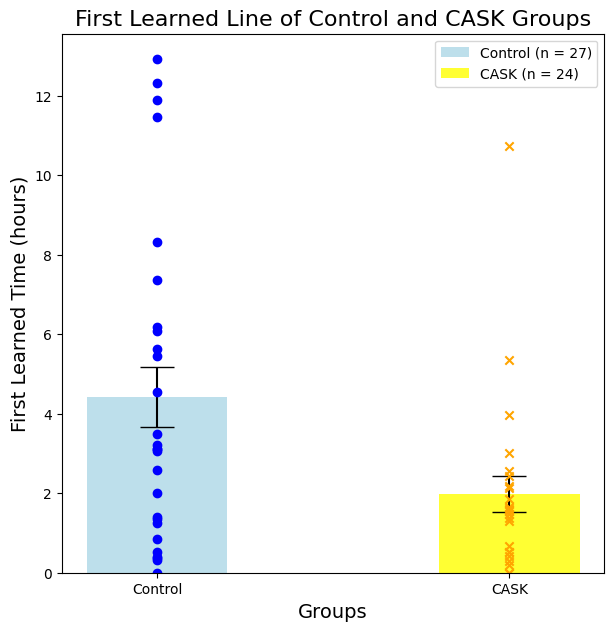

In [6]:
graph_avg_learned_line(ctrl=ctrl_learned_time, exp=cask_learned_time, exp_group_name='CASK')

#### Ctrl/Cask Ending/Overall Correct Rate

In [7]:
perform_T_test(ctrl_ending_corr, cask_ending_corr, test_side='greater')

P Value is  0.0036819866036367074
Experiment group is significantly greater than control group


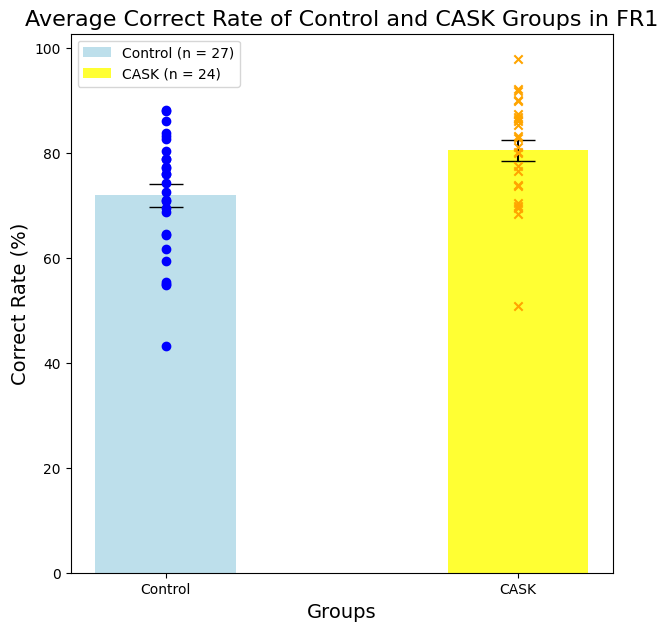

In [8]:
graph_avg_accuracy(ctrl=ctrl_ending_corr, exp=cask_ending_corr, exp_group_name='CASK')